To estimate the stability of a pairing of spaces, we look at their Inf-Sup condition, since we are in a discrete Case, we approximate it by the minimal eigenvalue of the generalized Eigenvalue problem

Import the necessary Libraries

In [1]:
from ngsolve import *
from netgen.occ import *
from ngsolve.webgui import Draw


Import the functions that calculate minimal eigenvalues of the generalized Eigenvalue Problem.
The functions are found in stability_estimation.py.

In [2]:
import stability_estimation as se


The main functions,estimate_stability(...) and  estimate_stability_dual_Mesh(...), take the following arguments:

 - num_mw: number of meshwidths, for 2 dimensions recommended to keep below 7 and for 3 dimensions below 5, if run on local computer
 - bnd: dirichlet boundary conditions in the format of NGSolve, dirichlet BC on all sides look in 2D look like this: "bottom|right|top|left"
 - diff_form: determines which whitney forms are looked at, e.g. diff_form = 1, will do the calculations for whitney 1-forms, needs to be smaller or equal to dim
 - dim: the dimension of the domain, 2 or 3, (only for estimate_stability(...), as the dual mesh was only implemented for 2D)
 - mesh_type: 'str' will create a structured mesh, 'unstr' a unstructured mesh
 - num_HO: the amount of high polynomial orders with which the Riesz representative will be approximated, 3 is recommended to see the trend
 - Swap_HCurl_HDiv: swaps the or appereance of $H(div)$ and $H(curl)$ in the 2D complexe, if false 1-forms in 2D will be raviert Thomas elements, if True they will be first kind Nédélec elements, for 3D does nothing



We first look at the simple approach, where the dual space is the same finite elements space as the primal space equipped with the dual norm

## Unstructured Mesh, without Boundary Conditions

In [ ]:
#2D 
d = 2
bound1 = "" #'bottom|right|top|left'
mt = 'unstr'
swap = False
num_mw2D = 4 #
min_evd2l0 = se.estimate_stability(num_mw2D,bnd=bound1,diff_form=0,dim=d,mesh_type=mt,num_HO=3,Swap_HCurl_HDiv=swap)
min_evd2l1 = se.estimate_stability(num_mw2D,bnd=bound1,diff_form=1,dim=d,mesh_type=mt,num_HO=3,Swap_HCurl_HDiv=swap)
min_evd2l2 = se.estimate_stability(num_mw2D,bnd=bound1,diff_form=2,dim=d,mesh_type=mt,num_HO=3,Swap_HCurl_HDiv=swap)


In [ ]:
#3D 
d = 3
num_mw3D = 3
min_evd3l0 = se.estimate_stability(num_mw3D,bnd=bound1,diff_form=0,dim=d,mesh_type=mt,num_HO=3,Swap_HCurl_HDiv=swap)
min_evd3l1 = se.estimate_stability(num_mw3D,bnd=bound1,diff_form=1,dim=d,mesh_type=mt,num_HO=3,Swap_HCurl_HDiv=swap)
min_evd3l2 = se.estimate_stability(num_mw3D,bnd=bound1,diff_form=2,dim=d,mesh_type=mt,num_HO=3,Swap_HCurl_HDiv=swap)
min_evd3l3 = se.estimate_stability(num_mw3D,bnd=bound1,diff_form=3,dim=d,mesh_type=mt,num_HO=3,Swap_HCurl_HDiv=swap)

Import the function that plots the Inf-Sup constant, which is the square root of the minimal Eigenvalue calculated

In [5]:
import plot_stability as ps

We can then look at the results of the experiments

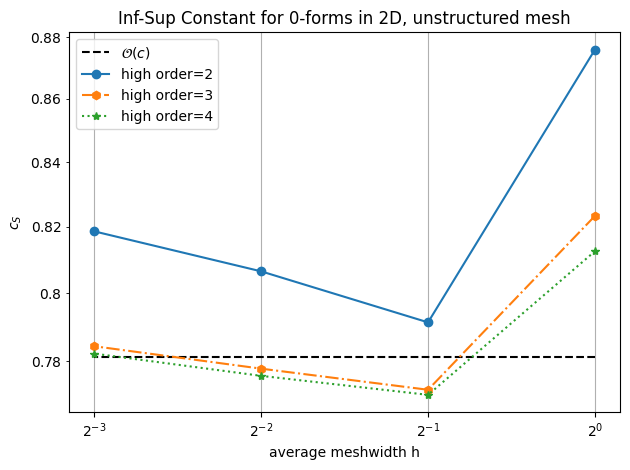

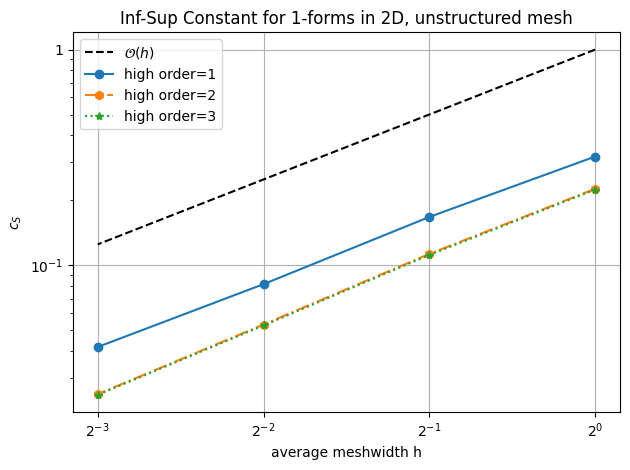

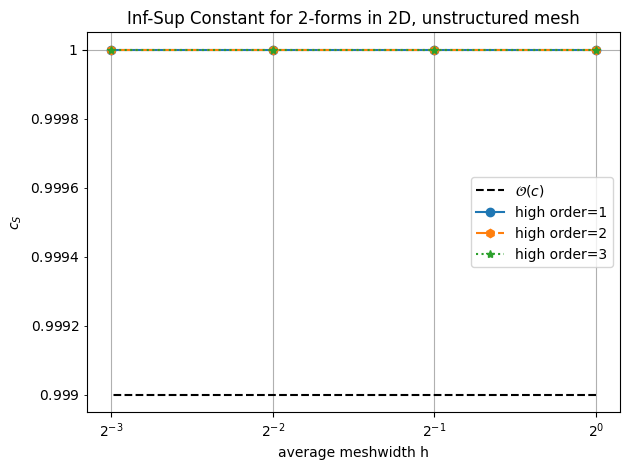

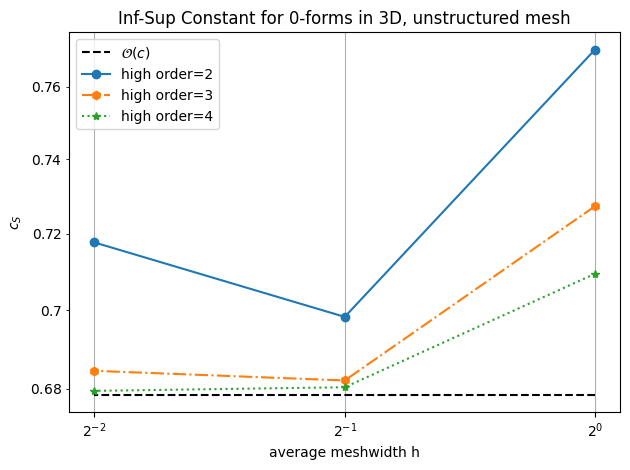

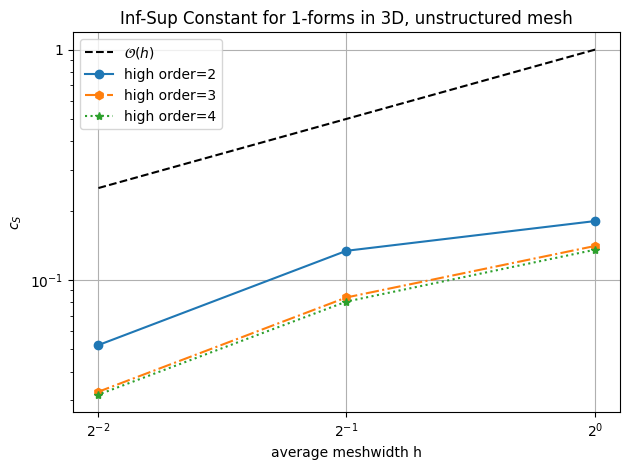

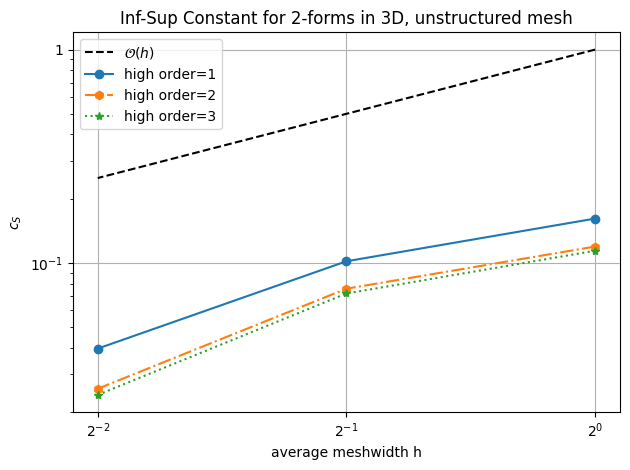

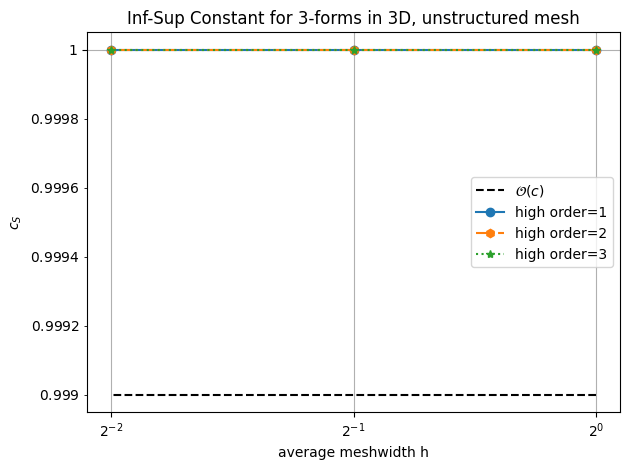

In [6]:
#2D
ps.stability_plot(min_evd2l0,2,0,meshtype=mt,BND=bound1, swap_HC_HD=swap)
ps.stability_plot(min_evd2l1,2,1,meshtype=mt,BND=bound1, swap_HC_HD=swap)
ps.stability_plot(min_evd2l2,2,2,meshtype=mt,BND=bound1, swap_HC_HD=swap)



#3D
ps.stability_plot(min_evd3l0,3,0,meshtype=mt,BND=bound1, swap_HC_HD=swap)
ps.stability_plot(min_evd3l1,3,1,meshtype=mt,BND=bound1, swap_HC_HD=swap)
ps.stability_plot(min_evd3l2,3,2,meshtype=mt,BND=bound1, swap_HC_HD=swap)
ps.stability_plot(min_evd3l3,3,3,meshtype=mt,BND=bound1, swap_HC_HD=swap)

## Structured Mesh, without Boundary Conditions

In [7]:
#2D with no bnd Conditions, on an structured mesh
d = 2
bound2 = "" 
mt = 'str'
swap = False
min_evd2l0 = se.estimate_stability(num_mw2D,bnd=bound2,diff_form=0,dim=d,mesh_type=mt,num_HO=3,Swap_HCurl_HDiv=swap)
min_evd2l1 = se.estimate_stability(num_mw2D,bnd=bound2,diff_form=1,dim=d,mesh_type=mt,num_HO=3,Swap_HCurl_HDiv=swap)
min_evd2l2 = se.estimate_stability(num_mw2D,bnd=bound2,diff_form=2,dim=d,mesh_type=mt,num_HO=3,Swap_HCurl_HDiv=swap)


In [8]:
#3D with no bnd Conditions, on an structured mesh
d = 3
min_evd3l0 = se.estimate_stability(num_mw3D,bnd=bound2,diff_form=0,dim=d,mesh_type=mt,num_HO=3,Swap_HCurl_HDiv=swap)
min_evd3l1 = se.estimate_stability(num_mw3D,bnd=bound2,diff_form=1,dim=d,mesh_type=mt,num_HO=3,Swap_HCurl_HDiv=swap)
min_evd3l2 = se.estimate_stability(num_mw3D,bnd=bound2,diff_form=2,dim=d,mesh_type=mt,num_HO=3,Swap_HCurl_HDiv=swap)
min_evd3l3 = se.estimate_stability(num_mw3D,bnd=bound2,diff_form=3,dim=d,mesh_type=mt,num_HO=3,Swap_HCurl_HDiv=swap)

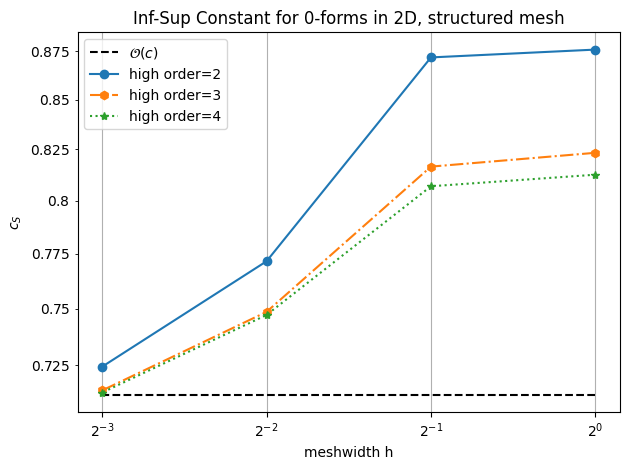

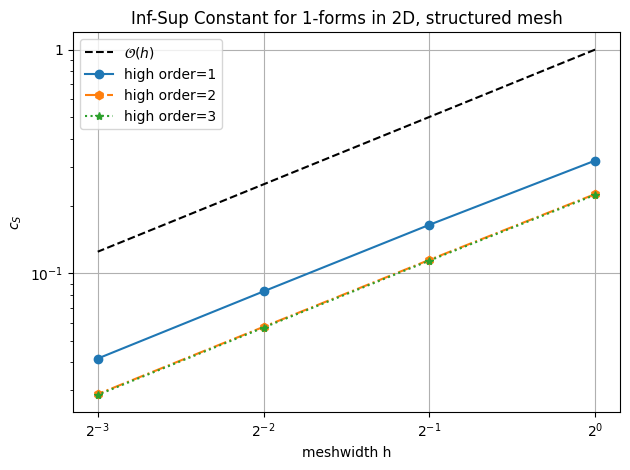

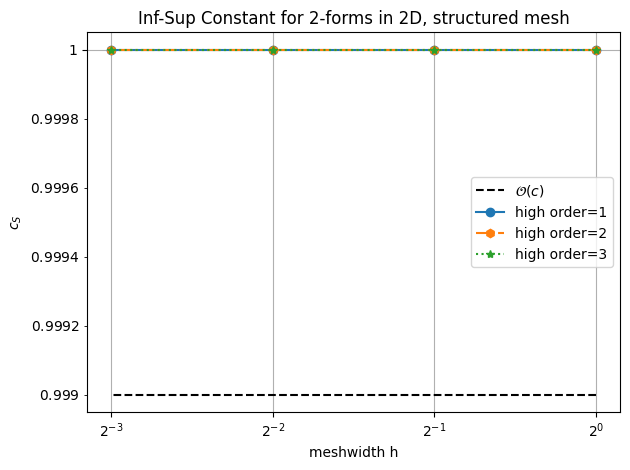

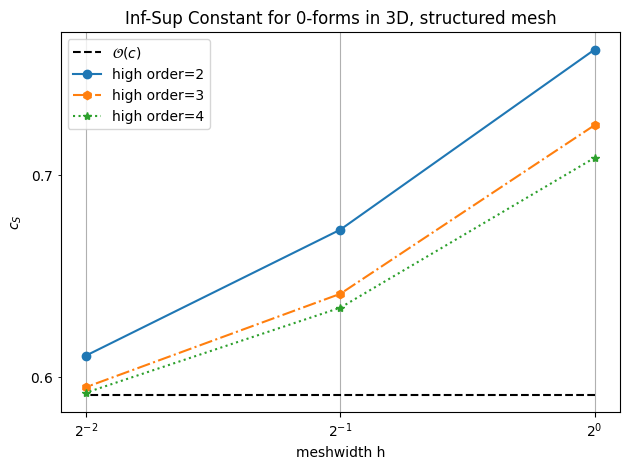

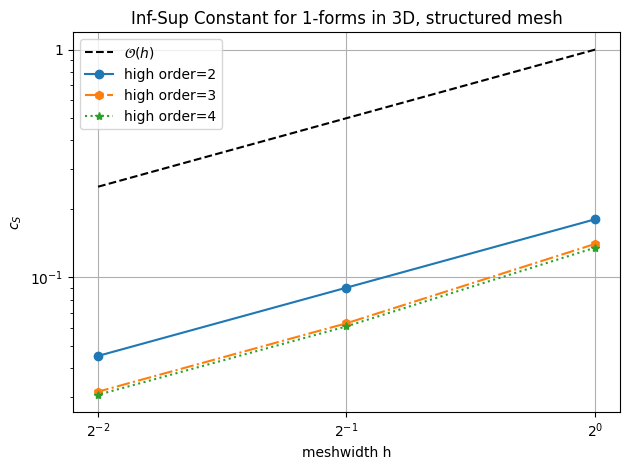

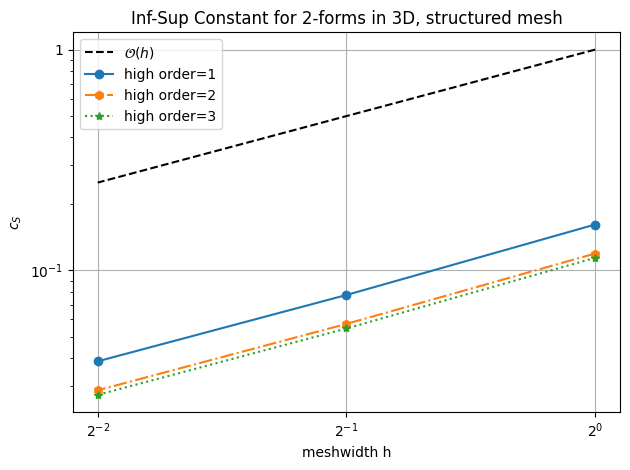

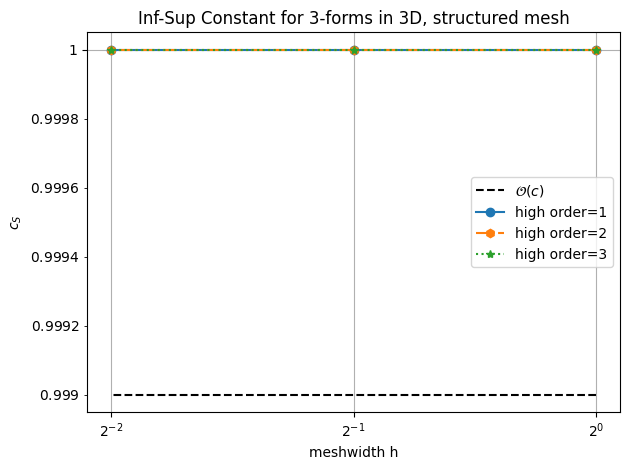

In [9]:
#2D
ps.stability_plot(min_evd2l0,2,0,meshtype=mt,BND=bound2, swap_HC_HD=swap)
ps.stability_plot(min_evd2l1,2,1,meshtype=mt,BND=bound2, swap_HC_HD=swap)
ps.stability_plot(min_evd2l2,2,2,meshtype=mt,BND=bound2, swap_HC_HD=swap)

#3D
ps.stability_plot(min_evd3l0,3,0,meshtype=mt,BND=bound2, swap_HC_HD=swap)
ps.stability_plot(min_evd3l1,3,1,meshtype=mt,BND=bound2, swap_HC_HD=swap)
ps.stability_plot(min_evd3l2,3,2,meshtype=mt,BND=bound2, swap_HC_HD=swap)
ps.stability_plot(min_evd3l3,3,3,meshtype=mt,BND=bound2, swap_HC_HD=swap)

# Dual Mesh
We have seen that there is no stability for 1-forms in 2D and 1-and 2-forms in 3D.
In 2D we can check if the dual mesh method, creates a stable pairing

## Unstructured Mesh, without Boundary Conditions

In [10]:
#first no bnd conditions on unstructured mesh
bound3 = ''
mt = 'unstr'
#we use H(curl) as the primal space, to stay consistent with the paper
swap = True

In [11]:
min_ev1 = se.estimate_stability_dual_Mesh(num_mw = num_mw2D, bnd = bound3, diff_form = 0, mesh_type = mt, num_HO = 3, Swap_HCurl_HDiv = swap)
min_ev2 = se.estimate_stability_dual_Mesh(num_mw = num_mw2D, bnd = bound3, diff_form = 1, mesh_type = mt, num_HO = 3, Swap_HCurl_HDiv = swap)
min_ev3 = se.estimate_stability_dual_Mesh(num_mw = num_mw2D, bnd = bound3, diff_form = 2, mesh_type = mt, num_HO = 3, Swap_HCurl_HDiv = swap)

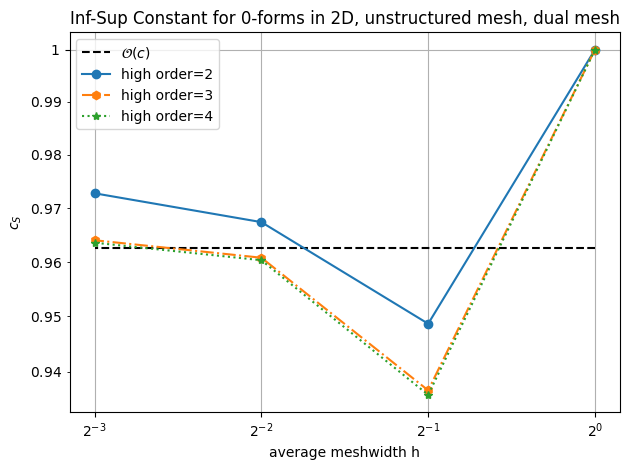

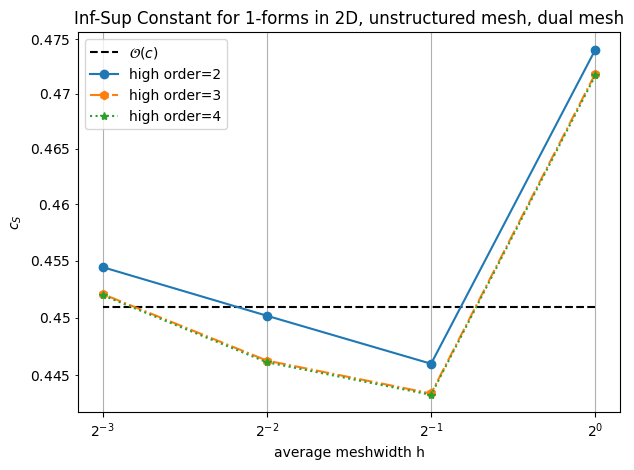

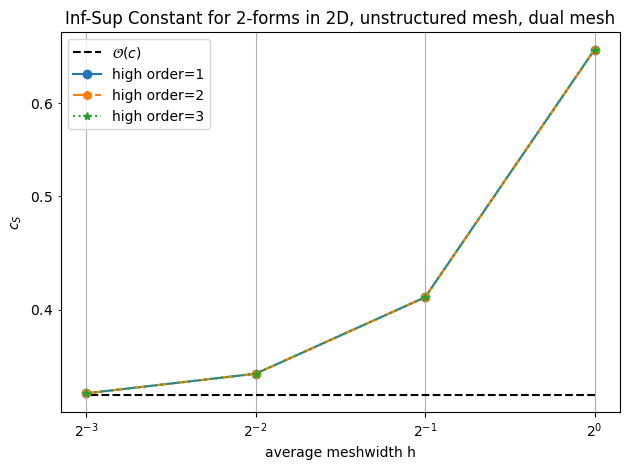

In [12]:
ps.stability_plot(min_ev1,2,0,BND=bound3,dual_mesh=True,meshtype=mt,swap_HC_HD=swap)
ps.stability_plot(min_ev2,2,1,BND=bound3,dual_mesh=True,meshtype=mt,swap_HC_HD=swap)
ps.stability_plot(min_ev3,2,2,BND=bound3,dual_mesh=True,meshtype=mt,swap_HC_HD=swap)

## Unstructured Mesh, with Boundary Conditions

In [ ]:

bound4 = 'bottom|left|right|top'

In [14]:
min_ev1 = se.estimate_stability_dual_Mesh(num_mw = num_mw2D, bnd = bound4, diff_form = 0, mesh_type = mt, num_HO = 3, Swap_HCurl_HDiv = swap)
min_ev2 = se.estimate_stability_dual_Mesh(num_mw = num_mw2D, bnd = bound4, diff_form = 1, mesh_type = mt, num_HO = 3, Swap_HCurl_HDiv = swap)
min_ev3 = se.estimate_stability_dual_Mesh(num_mw = num_mw2D, bnd = bound4, diff_form = 2, mesh_type = mt, num_HO = 3, Swap_HCurl_HDiv = swap)

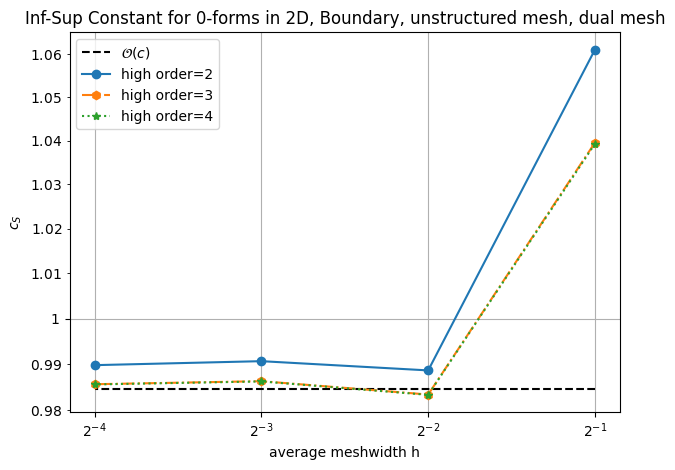

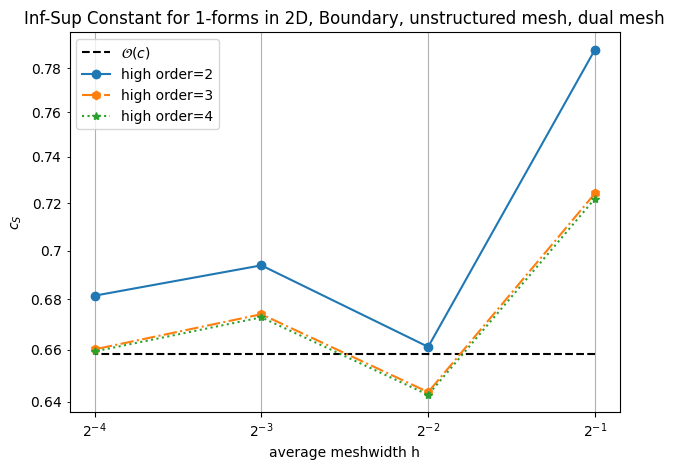

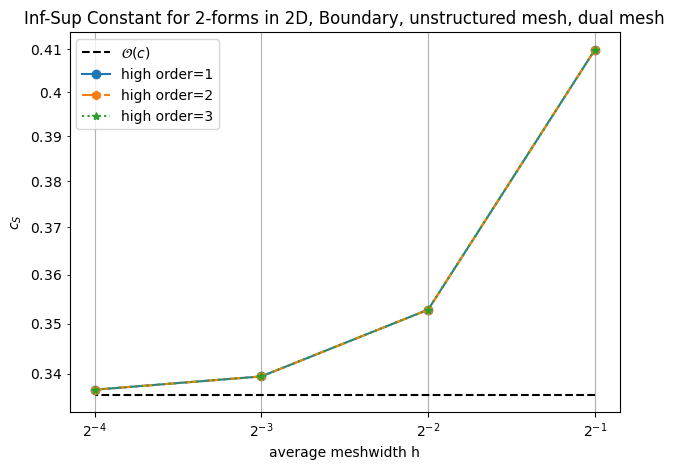

In [15]:
ps.stability_plot(min_ev1,2,0,BND=bound4,dual_mesh=True,meshtype=mt,swap_HC_HD=swap)
ps.stability_plot(min_ev2,2,1,BND=bound4,dual_mesh=True,meshtype=mt,swap_HC_HD=swap)
ps.stability_plot(min_ev3,2,2,BND=bound4,dual_mesh=True,meshtype=mt,swap_HC_HD=swap)

## Strcutured Mesh, without Boundary Conditions

In [16]:
bound5 = ''
mt ='str'

In [17]:
min_ev1 = se.estimate_stability_dual_Mesh(num_mw = num_mw2D, bnd = bound5, diff_form = 0, mesh_type = mt, num_HO = 3, Swap_HCurl_HDiv = swap)
min_ev2 = se.estimate_stability_dual_Mesh(num_mw = num_mw2D, bnd = bound5, diff_form = 1, mesh_type = mt, num_HO = 3, Swap_HCurl_HDiv = swap)
min_ev3 = se.estimate_stability_dual_Mesh(num_mw = num_mw2D, bnd = bound5, diff_form = 2, mesh_type = mt, num_HO = 3, Swap_HCurl_HDiv = swap)

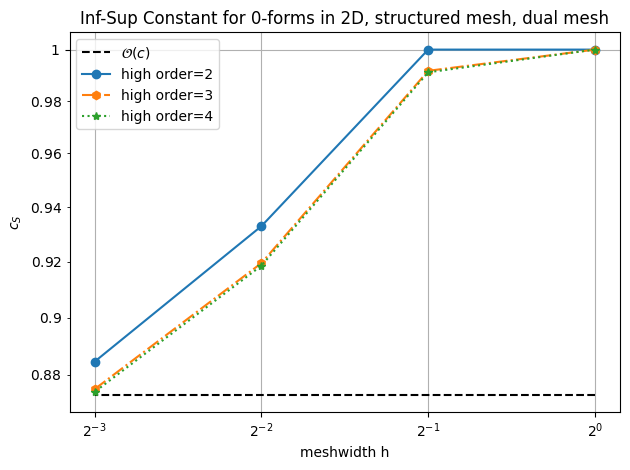

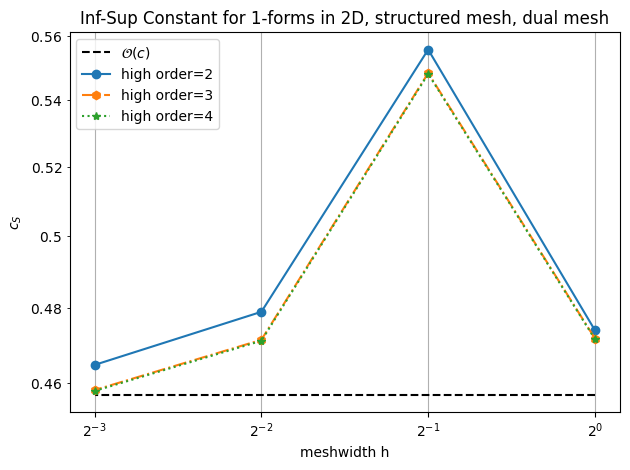

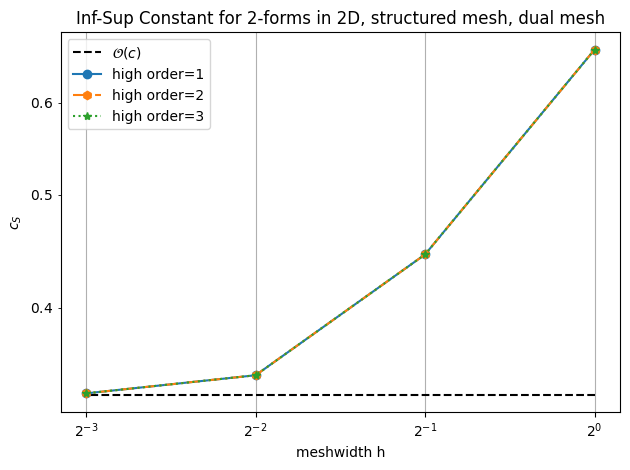

In [18]:
ps.stability_plot(min_ev1,2,0,BND=bound5,dual_mesh=True,meshtype=mt,swap_HC_HD=swap)
ps.stability_plot(min_ev2,2,1,BND=bound5,dual_mesh=True,meshtype=mt,swap_HC_HD=swap)
ps.stability_plot(min_ev3,2,2,BND=bound5,dual_mesh=True,meshtype=mt,swap_HC_HD=swap)

## Structured Mesh, with Boundary Conitions

In [19]:
bound6 = 'bottom|top|left|right'

In [20]:
min_ev1 = se.estimate_stability_dual_Mesh(num_mw = num_mw2D, bnd = bound6, diff_form = 0, mesh_type = mt, num_HO = 3, Swap_HCurl_HDiv = swap)
min_ev2 = se.estimate_stability_dual_Mesh(num_mw = num_mw2D, bnd = bound6, diff_form = 1, mesh_type = mt, num_HO = 3, Swap_HCurl_HDiv = swap)
min_ev3 = se.estimate_stability_dual_Mesh(num_mw = num_mw2D, bnd = bound6, diff_form = 2, mesh_type = mt, num_HO = 3, Swap_HCurl_HDiv = swap)

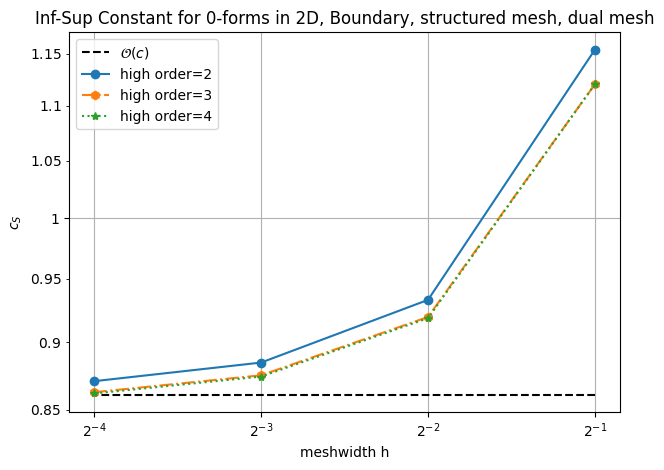

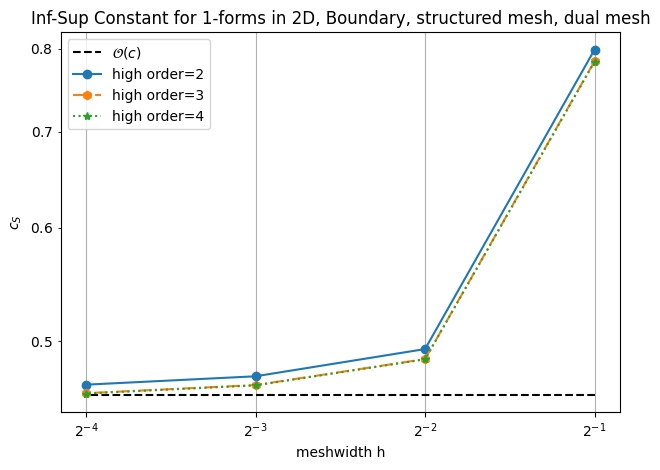

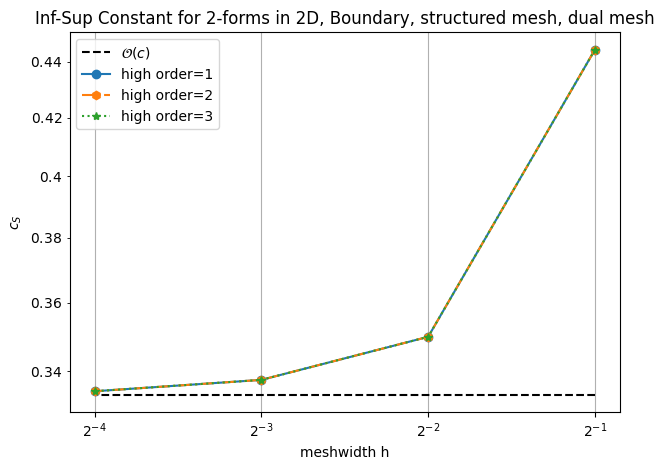

In [21]:
ps.stability_plot(min_ev1,2,0,BND=bound6,dual_mesh=True,meshtype=mt,swap_HC_HD=swap)
ps.stability_plot(min_ev2,2,1,BND=bound6,dual_mesh=True,meshtype=mt,swap_HC_HD=swap)
ps.stability_plot(min_ev3,2,2,BND=bound6,dual_mesh=True,meshtype=mt,swap_HC_HD=swap)